In [23]:
from sentence_transformers import SentenceTransformer,util

In [24]:
# 1. Load a pretrained Sentence-BERT model
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

In [25]:
# 2. Example sentences
sentences = [
    "The cat sits on the mat.",
    "A dog is playing in the park.",
    "The stock market crashed yesterday.",
    "Investors are worried about inflation.",
    "Apples and bananas are types of fruit.",
    "The river bank was flooded after the storm.",
    "He deposited money in the bank."
]

In [26]:
#embeddings = model.encode(sentences, convert_to_tensor=True)
embeddings = model.encode(sentences)

In [27]:
# 4. Compute cosine similarity between sentences
cosine_scores = util.cos_sim(embeddings, embeddings)

In [28]:
# 5. Print similarity matrix
for i in range(len(sentences)):
    for j in range(len(sentences)):
        print(f"Similarity({sentences[i]} , {sentences[j]}) = {cosine_scores[i][j]:.4f}")

Similarity(The cat sits on the mat. , The cat sits on the mat.) = 1.0000
Similarity(The cat sits on the mat. , A dog is playing in the park.) = 0.1215
Similarity(The cat sits on the mat. , The stock market crashed yesterday.) = 0.1048
Similarity(The cat sits on the mat. , Investors are worried about inflation.) = -0.0243
Similarity(The cat sits on the mat. , Apples and bananas are types of fruit.) = -0.0475
Similarity(The cat sits on the mat. , The river bank was flooded after the storm.) = -0.0175
Similarity(The cat sits on the mat. , He deposited money in the bank.) = 0.0290
Similarity(A dog is playing in the park. , The cat sits on the mat.) = 0.1215
Similarity(A dog is playing in the park. , A dog is playing in the park.) = 1.0000
Similarity(A dog is playing in the park. , The stock market crashed yesterday.) = 0.0241
Similarity(A dog is playing in the park. , Investors are worried about inflation.) = -0.0587
Similarity(A dog is playing in the park. , Apples and bananas are types o

In [29]:
# 6. Reduce dimensions with PCA (to 50D for t-SNE efficiency)
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
embeddings_pca = pca.fit_transform(embeddings)

In [30]:
# 5. Apply t-SNE to project into 2D
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
embeddings_2d = tsne.fit_transform(embeddings_pca)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Matplotlib is building the font cache; this may take a moment.


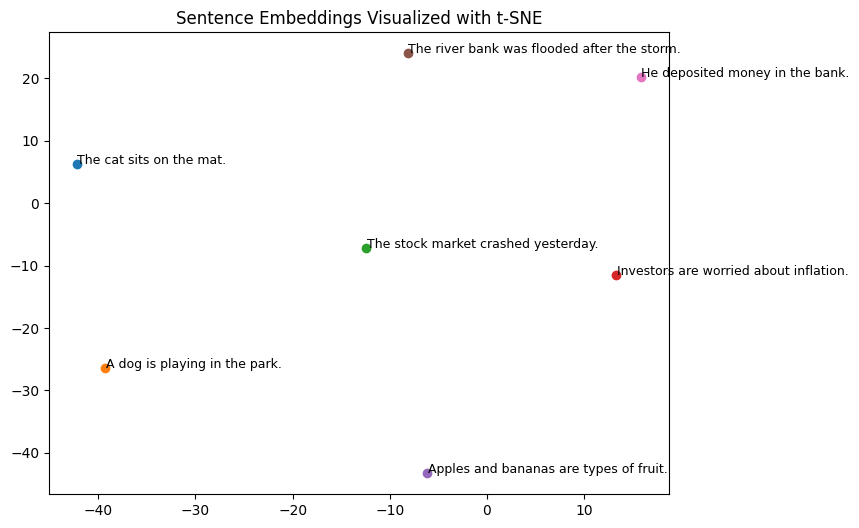

In [31]:
# 6. Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
for i, label in enumerate(sentences):
    x, y = embeddings_2d[i]
    plt.scatter(x, y)
    plt.text(x+0.02, y+0.02, label, fontsize=9)

plt.title("Sentence Embeddings Visualized with t-SNE")
plt.show()